In [36]:
import pandas as pd
import numpy as np
import ast
from sklearn import metrics
import matplotlib.pyplot as plt

adults

In [37]:
adults_100_corrected = pd.read_csv('./data/datasets2/adults100_corrected.csv')
display(adults_100_corrected)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,country,income
0,31,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,MoreThan50K
1,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,16,United-States,LessThan50K
2,51,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,None,MoreThan50K
3,26,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,LessThan50K
4,40,Private,Masters,None,Prof-specialty,Husband,White,Male,42,United-States,MoreThan50K
...,...,...,...,...,...,...,...,...,...,...,...
95,20,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,40,United-States,LessThan50K
96,26,Private,HS-grad,Married-civ-spouse,Craft-repair,Own-child,Asian-Pac-Islander,Male,40,United-States,LessThan50K
97,51,Local-gov,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,LessThan50K
98,40,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,90,United-States,MoreThan50K


In [38]:
adults_100_dirty = pd.read_csv('./data/datasets2/adults_dirty.csv').drop('row_id',axis=1).loc[:99]
display(adults_100_dirty)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,country,income,isClean
0,31-50,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,MoreThan50K,1
1,>50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,16,United-States,LessThan50K,1
2,>50,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,NaN,MoreThan50K,0
3,22-30,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,LessThan50K,1
4,31-50,Private,Masters,?,Prof-specialty,Husband,White,Male,42,United-States,MoreThan50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,18-21,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,40,United-States,LessThan50K,1
96,22-30,Private,HS-grad,Married-cmv-spoude,Craft-repair,Own-child,Asian-Pac-Islander,Male,40,United-States,LessThan50K,0
97,>50,Local-gov,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,LessThan50K,1
98,31-50,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,90,United-States,MoreThan50K,1


In [39]:
adults_isCleaned = pd.DataFrame(columns=['isClean'])
for ind in adults_100_corrected.index:
    for column in adults_100_corrected.columns:
        if str(adults_100_corrected[column][ind]) == str(adults_100_dirty[column][ind]):
            adults_isCleaned.loc[len(adults_isCleaned.index)] = [1]
        else:
            adults_isCleaned.loc[len(adults_isCleaned.index)] = [0]
    
display(adults_isCleaned)

,isClean
0,0
1,1
2,1
3,1
4,1
...,...
1095,1
1096,1
1097,1
1098,1


In [40]:
adults_100_clean = pd.read_csv('./data/datasets2/adults_clean.csv').drop('row_id',axis=1).loc[:99]
display(adults_100_clean)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,country,income
0,31-50,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,MoreThan50K
1,>50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,16,United-States,LessThan50K
2,>50,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,United-States,MoreThan50K
3,22-30,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,LessThan50K
4,31-50,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,42,United-States,MoreThan50K
...,...,...,...,...,...,...,...,...,...,...,...
95,18-21,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,40,United-States,LessThan50K
96,22-30,Private,HS-grad,Married-civ-spouse,Craft-repair,Own-child,Asian-Pac-Islander,Male,40,United-States,LessThan50K
97,>50,Local-gov,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,LessThan50K
98,31-50,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,90,United-States,MoreThan50K


In [41]:
adults_100_isClean_actual = pd.DataFrame(columns=['isClean'])
for ind in adults_100_clean.index:
    for column in adults_100_clean.columns:
        if str(adults_100_clean[column][ind]) == str(adults_100_dirty[column][ind]):
            adults_100_isClean_actual.loc[len(adults_100_isClean_actual.index)] = [1]
        else:
            adults_100_isClean_actual.loc[len(adults_100_isClean_actual.index)] = [0]
    
display(adults_100_isClean_actual)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
1095,1
1096,1
1097,1
1098,1


In [42]:
adults_acc = pd.DataFrame(columns=['isClean'])
for ind in adults_100_corrected.index:
    for column in adults_100_corrected.columns:
        if str(adults_100_corrected[column][ind]).lower() == str(adults_100_clean[column][ind]).lower():
            adults_acc.loc[len(adults_acc.index)] = [1]
        else:
            adults_acc.loc[len(adults_acc.index)] = [0]
    
display(adults_acc)

,isClean
0,0
1,1
2,1
3,1
4,1
...,...
1095,1
1096,1
1097,1
1098,1


In [43]:
print(sum(adults_acc['isClean']))

983


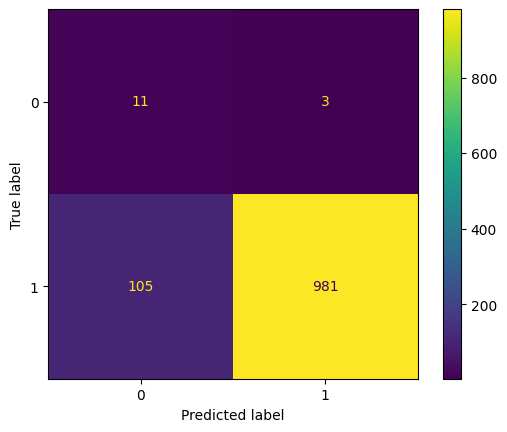

In [44]:
adults_full_confusion = metrics.confusion_matrix(adults_100_isClean_actual['isClean'],adults_isCleaned['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = adults_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [45]:
print(metrics.classification_report(adults_100_isClean_actual['isClean'],adults_isCleaned['isClean']))

              precision    recall  f1-score   support

           0       0.09      0.79      0.17        14
           1       1.00      0.90      0.95      1086

    accuracy                           0.90      1100
   macro avg       0.55      0.84      0.56      1100
weighted avg       0.99      0.90      0.94      1100



hospital

In [46]:
hospital_100_corrected = pd.read_csv('./data/datasets2/hospital100_corrected.csv')
display(hospital_100_corrected)

,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg
0,10018,Callahan Eye Foundation Hospital,1720 University Blvd,None,None,Birmingham,AL,35233,Jefferson,2053258100,Acute Care Hospitals,Voluntary Non-Profit - Private,Yes,Surgical Infection Prevention,SCIP-Inf-6,Surgery patients needing hair removed from the...,None,None,AL_SCIP-Inf-6
1,119,Helen Keller Memorial Hospital,1300 South Montgomery Avenue,None,None,Sheffield,AL,35660,Jefferson,2563864556,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Heart Attack,AMI-7a,Heart attack patients given fibrinolytic medic...,None,0 patients,AL_AMI-7a
2,10019,Helen Keller Memorial Hospital,1300 South Montgomery Avenue,None,None,Sheffield,AL,35660,Jefferson,2563864556,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Heart Failure,HF-4,Heart failure patients given smoking cessation...,100%,41 patients,AL_HF-4
3,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,None,None,Dothan,AL,36302,Houston,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Pneumonia,PN-6,Pneumonia patients given the most appropriate ...,80%,147 patients,AL_PN-6
4,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,None,None,Dothan,AL,36302,Houston,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Surgical Infection Prevention,SCIP-Card-2,Surgery patients who were taking heart drugs c...,72%,79 patients,AL_SCIP-Card-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10050,St. Vincent's Blount,150 Gilbreath Drive,None,None,Oneonta,AL,35121,Blount,2052743000,Acute Care Hospitals,Voluntary Non-Profit - Private,Yes,Heart Failure,HF-1,Heart failure patients given discharge instruc...,50%,24 patients,AL_HF-1
96,10050,st vincents blount,150 gilbreath drive,None,None,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-2,pneumonia patients assessed and given pneumoco...,74%,92 patients,al_pn-2
97,10050,st vincents blount,150 gilbreath drive,None,None,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-6,pneumonia patients given the most appropriate ...,77%,74 patients,al_pn-6
98,10050,St. Vincent's Blount,150 Gilbreath Drive,None,None,Oneonta,AL,35121,Blount,2052743000,Acute Care Hospitals,Voluntary Non-Profit - Private,Yes,Surgical Infection Prevention,SCIP-Card-2,Surgery patients who were taking heart drugs c...,25%,8 patients,AL_SCIP-Card-2


In [47]:
hospital_100_dirty = pd.read_csv('./data/datasets2/hospital_dirty.csv').loc[:99]
display(hospital_100_dirty)

,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg,isClean
0,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,NaN,NaN,al_scip-card-2,0
1,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-1,surgery patients who were given an antibiotic ...,NaN,NaN,al_scip-inf-1,1
2,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-2,surgery patients who were given the right kin...,NaN,NaN,al_scip-inf-2,1
3,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birminghxm,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-3,surgery patients whose preventive antibiotics ...,NaN,NaN,al_scip-inf-3,0
4,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-4,all heart surgery patients whose blood sugar (...,NaN,NaN,al_scip-inf-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,ami-2,heart attack patients given aspirin at discharge,50%,2 patients,al_ami-2,1
96,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,ami-3,heart attack patients given ace inhibitor or a...,NaN,0 patients,al_ami-3,1
97,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,axi-4,heart attack patients given smoking cessation ...,NaN,0 patients,al_ami-4,0
98,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,xl,36467,covington,3344933541,acute care hosxitals,voluntary non-profit - private,no,heart attack,ami-5,heart attack patients given beta blocker at di...,100%,2 patients,al_ami-5,0


In [48]:
hospital_100_clean = pd.read_csv('./data/datasets2/hospital_clean.csv').loc[:99]
display(hospital_100_clean)

,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg
0,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,NaN,NaN,al_scip-card-2
1,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-1,surgery patients who were given an antibiotic ...,NaN,NaN,al_scip-inf-1
2,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-2,surgery patients who were given the right kin...,NaN,NaN,al_scip-inf-2
3,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-3,surgery patients whose preventive antibiotics ...,NaN,NaN,al_scip-inf-3
4,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-4,all heart surgery patients whose blood sugar (...,NaN,NaN,al_scip-inf-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,ami-2,heart attack patients given aspirin at discharge,50%,2 patients,al_ami-2
96,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,ami-3,heart attack patients given ace inhibitor or a...,NaN,0 patients,al_ami-3
97,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,ami-4,heart attack patients given smoking cessation ...,NaN,0 patients,al_ami-4
98,10007,mizell memorial hospital,702 n main st,NaN,NaN,opp,al,36467,covington,3344933541,acute care hospitals,voluntary non-profit - private,no,heart attack,ami-5,heart attack patients given beta blocker at di...,100%,2 patients,al_ami-5


In [49]:
hospital_isCleaned = pd.DataFrame(columns=['isClean'])
for ind in hospital_100_corrected.index:
    for column in hospital_100_corrected.columns:
        if str(hospital_100_corrected[column][ind]) == str(hospital_100_dirty[column][ind]):
            hospital_isCleaned.loc[len(hospital_isCleaned.index)] = [1]
        else:
            hospital_isCleaned.loc[len(hospital_isCleaned.index)] = [0]
    
display(hospital_isCleaned)

,isClean
0,1
1,0
2,0
3,0
4,0
...,...
1895,0
1896,0
1897,0
1898,0


In [50]:
hospital_acc = pd.DataFrame(columns=['isClean'])
for ind in hospital_100_corrected.index:
    for column in hospital_100_corrected.columns:
        if str(hospital_100_corrected[column][ind]).lower() == str(hospital_100_clean[column][ind]).lower():
            hospital_acc.loc[len(hospital_acc.index)] = [1]
        else:
            hospital_acc.loc[len(hospital_acc.index)] = [0]
    
display(hospital_acc)

,isClean
0,1
1,1
2,1
3,0
4,0
...,...
1895,0
1896,0
1897,0
1898,0


In [51]:
print(sum(hospital_acc['isClean']))

370


In [52]:
hospital_100_isClean_actual = pd.DataFrame(columns=['isClean'])
for ind in hospital_100_clean.index:
    for column in hospital_100_clean.columns:
        if str(hospital_100_clean[column][ind]) == str(hospital_100_dirty[column][ind]):
            hospital_100_isClean_actual.loc[len(hospital_100_isClean_actual.index)] = [1]
        else:
            hospital_100_isClean_actual.loc[len(hospital_100_isClean_actual.index)] = [0]
    
display(hospital_100_isClean_actual)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
1895,1
1896,1
1897,1
1898,1


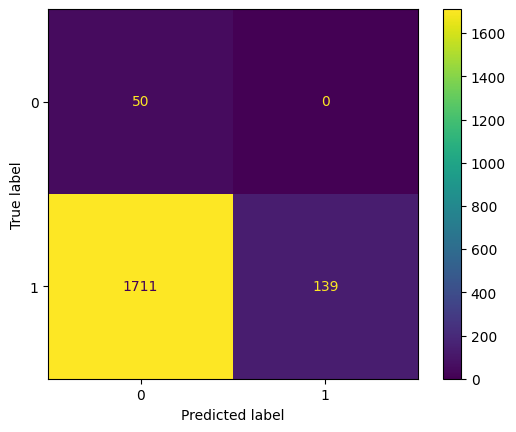

In [53]:
hospital_full_confusion = metrics.confusion_matrix(hospital_100_isClean_actual['isClean'],hospital_isCleaned['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = hospital_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [54]:
print(metrics.classification_report(hospital_100_isClean_actual['isClean'],hospital_isCleaned['isClean']))

              precision    recall  f1-score   support

           0       0.03      1.00      0.06        50
           1       1.00      0.08      0.14      1850

    accuracy                           0.10      1900
   macro avg       0.51      0.54      0.10      1900
weighted avg       0.97      0.10      0.14      1900



flights

In [55]:
flights_100_corrected = pd.read_csv('./data/datasets2/flights100_corrected.csv')
display(flights_100_corrected)

,src,flight,scheduled_dept,actual_dept,dept_gate,scheduled_arrival,actual_arrival,arrival_gate
0,ua,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
1,airtravelcenter,2011-12-01-UA-2708-EWR-CLT,NaN,2011-12-01 3:04 PM -05:00,NaN,NaN,2011-12-01 4:22 PM -05:00,NaN
2,myrateplan,2011-12-01-UA-2708-EWR-CLT,NaN,2011-12-01 3:04 PM -05:00,NaN,NaN,2011-12-01 4:22 PM -05:00,NaN
3,helloflight,2011-12-01-UA-2708-EWR-CLT,NaN,2011-12-01 3:04 PM -05:00,NaN,NaN,2011-12-01 4:22 PM -05:00,NaN
4,flytecomm,2011-12-01-UA-2708-EWR-CLT,NaN,2011-12-01 3:04 PM -05:00,NaN,NaN,2011-12-01 4:22 PM -05:00,NaN
...,...,...,...,...,...,...,...,...
95,flightaware,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10 AM PST,2011-12-01 07:32 AM PST,47A,2011-12-01 02:52 PM EST,2011-12-01 03:12 PM EST,B36
96,wunderground,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10 AM PST,2011-12-01 07:32 AM PST,47A,2011-12-01 02:52 PM EST,2011-12-01 03:12 PM EST,B36
97,flights,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10 AM,2011-12-01 07:31 AM,47A,2011-12-01 03:30 PM,2011-12-01 03:14 PM,B36
98,businesstravellogue,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10 AM,2011-12-01 07:31 AM,47A,2011-12-01 03:30 PM,2011-12-01 03:14 PM,B36


In [56]:
flights_100_dirty = pd.read_csv('./data/datasets2/flight_dirty.csv').loc[:99]
display(flights_100_dirty)

,src,flight,scheduled_dept,actual_dept,dept_gate,scheduled_arrival,actual_arrival,arrival_gate,isClean
0,ua,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5,1
1,airtravelcenter,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
2,myrateplan,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
3,helloflight,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
4,flytecomm,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
...,...,...,...,...,...,...,...,...,...
95,flightaware,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10AM PST,2011-12-01 07:32AM PST,47A,2011-12-01 02:52PM EST,2011-12-01 03:12PM EST,B36,0
96,wunderground,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10AM PST,2011-12-01 07:32AM PST,47A,2011-12-01 02:52PM EST,2011-12-01 03:12PM EST,B36,0
97,flights,2011-12-01-AA-222-LAX-BOS,07:10 AM Thu 01-Dec-2011,07:31 AM Thu 01-Dec-2011,47A,03:30 PM Thu 01-Dec-2011,03:14 PM Thu 01-Dec-2011,B36,0
98,businesstravellogue,2011-12-01-AA-222-LAX-BOS,07:10 AM Thu 01-Dec-2011,07:31 AM Thu 01-Dec-2011,47A,03:30 PM Thu 01-Dec-2011,03:14 PM Thu 01-Dec-2011,B36,0


In [57]:
flights_100_clean = pd.read_csv('./data/datasets2/flight_clean.csv').loc[:99]
display(flights_100_clean)

,src,flight,scheduled_dept,actual_dept,dept_gate,scheduled_arrival,actual_arrival,arrival_gate
0,ua,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
1,airtravelcenter,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
2,myrateplan,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
3,helloflight,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
4,flytecomm,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
...,...,...,...,...,...,...,...,...
95,flightaware,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36
96,wunderground,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36
97,flights,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36
98,businesstravellogue,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36


In [58]:
flights_isCleaned = pd.DataFrame(columns=['isClean'])
for ind in flights_100_corrected.index:
    for column in flights_100_corrected.columns:
        if str(flights_100_corrected[column][ind]) == str(flights_100_dirty[column][ind]):
            flights_isCleaned.loc[len(flights_isCleaned.index)] = [1]
        else:
            flights_isCleaned.loc[len(flights_isCleaned.index)] = [0]
    
display(flights_isCleaned)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
795,0
796,1
797,0
798,0


In [59]:
flights_100_isClean_actual = pd.DataFrame(columns=['isClean'])
for ind in flights_100_clean.index:
    for column in flights_100_clean.columns:
        if str(flights_100_clean[column][ind]) == str(flights_100_dirty[column][ind]):
            flights_100_isClean_actual.loc[len(flights_100_isClean_actual.index)] = [1]
        else:
            flights_100_isClean_actual.loc[len(flights_100_isClean_actual.index)] = [0]
    
display(flights_100_isClean_actual)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
795,0
796,1
797,0
798,0


In [60]:
flights_acc = pd.DataFrame(columns=['isClean'])
for ind in flights_100_corrected.index:
    for column in flights_100_corrected.columns:
        if str(flights_100_corrected[column][ind]).lower() == str(flights_100_clean[column][ind]).lower():
            flights_acc.loc[len(flights_acc.index)] = [1]
        else:
            flights_acc.loc[len(flights_acc.index)] = [0]
    
display(flights_acc)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
795,0
796,1
797,0
798,0


In [61]:
print(sum(flights_acc['isClean']))

263


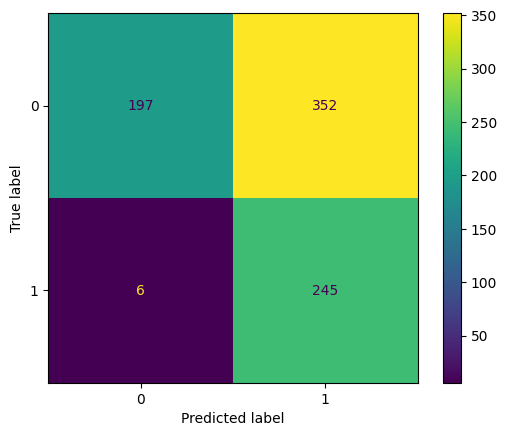

In [62]:
flights_full_confusion = metrics.confusion_matrix(flights_100_isClean_actual['isClean'],flights_isCleaned['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = flights_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [63]:
print(metrics.classification_report(flights_100_isClean_actual['isClean'],flights_isCleaned['isClean']))

              precision    recall  f1-score   support

           0       0.97      0.36      0.52       549
           1       0.41      0.98      0.58       251

    accuracy                           0.55       800
   macro avg       0.69      0.67      0.55       800
weighted avg       0.79      0.55      0.54       800



In [65]:
total_pred = pd.DataFrame()
total_pred = total_pred.append(hospital_isCleaned).append(adults_isCleaned).append(flights_isCleaned)
total_pred = total_pred.reset_index().drop('index',axis=1)
total_actual = pd.DataFrame()
total_actual = total_actual.append(hospital_100_isClean_actual).append(adults_100_isClean_actual).append(flights_100_isClean_actual)
total_actual = total_actual.reset_index().drop('index',axis=1)

C:\Users\reece\AppData\Local\Temp\ipykernel_49120\2794295489.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pred = total_pred.append(hospital_isCleaned).append(adults_isCleaned).append(flights_isCleaned)
C:\Users\reece\AppData\Local\Temp\ipykernel_49120\2794295489.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pred = total_pred.append(hospital_isCleaned).append(adults_isCleaned).append(flights_isCleaned)
C:\Users\reece\AppData\Local\Temp\ipykernel_49120\2794295489.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pred = total_pred.append(hospital_isCleaned).append(adults_isCleaned).append(flights_isCleaned)
C:\Users\reece\AppData\Local\Temp\ipykernel_49120\2794295489.py:5: FutureWarning: The fr

In [66]:
for ind in range(len(total_pred.index)):
    if total_pred['isClean'][ind] == -1:
        total_pred['isClean'][ind] = 0 if total_actual['isClean'][ind] == 1 else 0

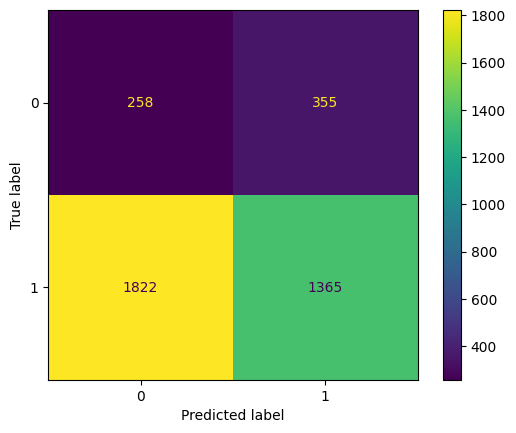

In [67]:
total_confusion = metrics.confusion_matrix(total_actual['isClean'],total_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = total_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [68]:
print(metrics.classification_report(total_actual['isClean'],total_pred['isClean']))

              precision    recall  f1-score   support

           0       0.12      0.42      0.19       613
           1       0.79      0.43      0.56      3187

    accuracy                           0.43      3800
   macro avg       0.46      0.42      0.37      3800
weighted avg       0.69      0.43      0.50      3800

